In [ ]:
#imports requeridos para que el proyecto funcione
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.service import Service
import time
import os

In [ ]:
# Configurar la ruta de descarga (usando una ruta absoluta)
download_path = r"C:\Users\jose1\OneDrive\Escritorio\proyectoFinalAnalisisAlgoritmos"  # Cambia esto a tu ruta real
os.makedirs(download_path, exist_ok=True)  # Crear la carpeta si no existe

chrome_options = webdriver.ChromeOptions()


# Configuración de preferencias de descargas
prefs = {
    "download.default_directory": download_path,
    "download.prompt_for_download": False,
    "download.directory_upgrade": True,
    "safebrowsing.enabled": False,  # Desactivar SafeBrowsing puede ayudar
    "profile.default_content_settings.popups": 0,
    "profile.content_settings.exceptions.automatic_downloads.*.setting": 1
}
chrome_options.add_experimental_option("prefs", prefs)

# Argumentos adicionales que pueden ayudar
chrome_options.add_argument("--disable-extensions")
chrome_options.add_argument("--disable-download-notification")
chrome_options.add_argument("--disable-popup-blocking")

# Iniciar el navegador
driver = webdriver.Chrome(options=chrome_options)

# Abrir la URL
url1 = 'https://login.intelproxy.com/v2/inicio?cuenta=7Ah6RNpGWF22jjyq'
driver.get(url1)

Error sending stats to Plausible: error sending request for url (https://plausible.io/api/event)


In [65]:
login_button = WebDriverWait(driver, 20).until(
        EC.element_to_be_clickable((By.XPATH, "/html/body/div/div/div/div[1]/div[2]/a"))
)
login_button.click()

In [66]:
email_input = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.ID, "identifierId"))
)

email_input.send_keys("jfgabinov@uqvirtual.edu.co")
email_input.send_keys(Keys.RETURN)

In [67]:
password_input = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.NAME, "Passwd"))
)# Nombre del campo de contraseña
password_input.send_keys("95123005369UQ")
password_input.send_keys(Keys.RETURN)

In [68]:
# Buscar el botón por su XPath
boton = WebDriverWait(driver, 20).until(
    EC.element_to_be_clickable((By.XPATH, "/html/body/div[3]/div[2]/div[3]/div/div[2]/div/main/div[1]/div[5]/div/details[7]/summary"))
)

time.sleep(10)

boton.click()

print("Botón presionado exitosamente")

Botón presionado exitosamente


In [69]:
# Buscar el enlace a IEEE por su XPath
enlaceIEEE = WebDriverWait(driver, 15).until(
    EC.element_to_be_clickable((By.XPATH, "//*[@id='facingenieraieeeinstituteofelectricalandelectronicsengineersdescubridor']/div/div/h3/a"))
)

In [70]:
# Hacer clic en el enlace
enlaceIEEE.click()

In [71]:
try:
    # Esperar a que aparezca el botón de aceptar/cerrar cookies
    boton_cookies = WebDriverWait(driver, 20).until(
        EC.element_to_be_clickable((By.XPATH, "/html/body/div[1]/div[2]/div[2]/button[2]"))  # Usa el XPath correcto
    )
    driver.execute_script("arguments[0].click();", boton_cookies)
    print("Se cerró la ventana de cookies.")
except:
    print("⚠ No apareció la ventana de cookies o ya estaba cerrada.")

Se cerró la ventana de cookies.


In [72]:
# Esperar a que la barra de búsqueda esté en el DOM
barra_busqueda = WebDriverWait(driver, 15).until(
    EC.presence_of_element_located((By.XPATH, "//*[@id='LayoutWrapper']/div/div/div[3]/div/xpl-root/header/xpl-header/div/div[2]/div[2]/xpl-search-bar-migr/div/form/div[2]/div/div[1]/xpl-typeahead-migr/div/input"))
)

In [ ]:
# Escribir "computational thinking" entre comillas para reducir el rango de busqueda
barra_busqueda.send_keys('"computational thinking"')

In [74]:
# Esperar a que el botón de búsqueda esté clickeable
boton_buscar = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH, "//*[@id='LayoutWrapper']/div/div/div[3]/div/xpl-root/header/xpl-header/div/div[2]/div[2]/xpl-search-bar-migr/div/form/div[2]/div/div[2]/button"))
)

In [75]:
boton_buscar.click()

In [76]:
# Función para verificar que la descarga se completó
def esperar_descarga(carpeta, tiempo_max=30):
    """
    Espera hasta que aparezca un nuevo archivo .bib en la carpeta de descargas
    o hasta que se agote el tiempo máximo.
    """
    inicio = time.time()
    archivos_iniciales = set([f for f in os.listdir(carpeta) if f.endswith('.bib')])
    
    while time.time() - inicio < tiempo_max:
        time.sleep(2)  # Comprobar cada 2 segundos
        archivos_actuales = set([f for f in os.listdir(carpeta) if f.endswith('.bib')])
        nuevos_archivos = archivos_actuales - archivos_iniciales
        
        if nuevos_archivos:
            # Encontró nuevo archivo
            nuevo_archivo = list(nuevos_archivos)[0]
            return os.path.join(carpeta, nuevo_archivo)
        
    print("⚠️ Tiempo de espera de descarga agotado.")
    return None


In [77]:
try:
    # Esperar a que aparezca el botón de aceptar/cerrar cookies
    boton_cookies = WebDriverWait(driver, 20).until(
        EC.element_to_be_clickable((By.XPATH, "/html/body/div[1]/div[2]/div[2]/button[2]"))  # Usa el XPath correcto
    )
    boton_cookies.click()
    print("Se cerró la ventana de cookies.")
except:
    print("⚠ No apareció la ventana de cookies o ya estaba cerrada.")

⚠ No apareció la ventana de cookies o ya estaba cerrada.


In [78]:
# Esperar a que el items por page esté presente y clickeable
itemsPerPage_link = WebDriverWait(driver, 10).until(
EC.presence_of_element_located((By.XPATH, '/html/body/div[5]/div/div/div[3]/div/xpl-root/main/div/xpl-search-results/div/div[1]/div[1]/ul/li[2]/xpl-rows-per-page-drop-down/div/button'))
)

itemsPerPage_link.click()

# Esperar a que el 100 esté presente y clickeable
cien_link = WebDriverWait(driver, 10).until(
EC.presence_of_element_located((By.XPATH, '/html/body/div[5]/div/div/div[3]/div/xpl-root/main/div/xpl-search-results/div/div[1]/div[1]/ul/li[2]/xpl-rows-per-page-drop-down/div/div/button[5]'))
)

cien_link.click()

In [ ]:

# Bucle para navegar a través de 11 páginas
for page_num in range(1, 12):
    print(f"Procesando página {page_num} de 11...")
    
    
    # Esperar a que la página se cargue completamente
    time.sleep(2)


    # Esperar a que el checkbox esté presente y clickeable
    try:
        checkbox = WebDriverWait(driver, 15).until(
            EC.presence_of_element_located((By.XPATH, '//*[@id="xplMainContent"]/div[2]/div[2]/xpl-results-list/div[2]/label/input'))
        )
        
        # Hacer clic en el checkbox si no está seleccionado
        if not checkbox.is_selected():
            driver.execute_script("arguments[0].click();", checkbox)  # Forzar clic con JS
            time.sleep(1)  # Pequeña pausa para asegurar que se registra el clic
    except Exception as e:
        print(f"⚠️ Error al seleccionar checkbox en página {page_num}: {e}")
        continue  # Intenta con la siguiente página
    
    # Esperar a que el export esté presente y clickeable
    try:
        enlace = WebDriverWait(driver, 15).until(
            EC.element_to_be_clickable((By.XPATH, "//*[@id='xplMainContent']/div[1]/div[1]/ul/li[3]/xpl-export-search-results/button"))
        )
        
        # Hacer clic en el export
        driver.execute_script("arguments[0].click();", enlace)
        time.sleep(2)
    except Exception as e:
        print(f"⚠️ Error al hacer clic en export en página {page_num}: {e}")
        continue
    
    # Esperar a que el elemento Citations esté presente y visible
    try:
        all_results = WebDriverWait(driver, 15).until(
            EC.visibility_of_element_located((By.XPATH, "/html/body/ngb-modal-window/div/div/div[1]/ul/li[2]/a"))
        )
        
        # Hacer clic en el elemento Citations
        all_results.click()
        time.sleep(2)
    except Exception as e:
        print(f"⚠️ Error al seleccionar Citations en página {page_num}: {e}")
        # Intentar cerrar la ventana si hay un error
        try:
            driver.find_element(By.XPATH, "/html/body/ngb-modal-window/div/div/div[1]/div/i").click()
        except:
            pass
        continue
    
    # Esperar a que el botón BibTeX esté presente y clickeable
    try:
        bibtex_link = WebDriverWait(driver, 15).until(
            EC.element_to_be_clickable((By.XPATH, "/html/body/ngb-modal-window/div/div/div[2]/div/xpl-citation-download/form/div[1]/section[1]/div/label[2]/input"))
        )
        
        # Hacer clic en BibTeX
        bibtex_link.click()
        time.sleep(1)
    except Exception as e:
        print(f"⚠️ Error al seleccionar BibTeX en página {page_num}: {e}")
        try:
            driver.find_element(By.XPATH, "/html/body/ngb-modal-window/div/div/div[1]/div/i").click()
        except:
            pass
        continue
    
    # Esperar a que el botón "citation and abstract" esté presente y clickeable
    try:
        citAndAbstract_link = WebDriverWait(driver, 15).until(
            EC.element_to_be_clickable((By.XPATH, "/html/body/ngb-modal-window/div/div/div[2]/div/xpl-citation-download/form/div[1]/section[2]/div/label[2]/input"))
        )
        
        # Hacer clic en "citation and abstract"
        citAndAbstract_link.click()
        time.sleep(1)
    except Exception as e:
        print(f"⚠️ Error al seleccionar Citation and Abstract en página {page_num}: {e}")
        try:
            driver.find_element(By.XPATH, "/html/body/ngb-modal-window/div/div/div[1]/div/i").click()
        except:
            pass
        continue
    
    # Guardar la lista de archivos antes de descargar
    archivos_antes = set([f for f in os.listdir(download_path) if f.endswith('.bib')])
    
    # Esperar a que el botón de descarga esté presente y clickeable
    try:
        download_button = WebDriverWait(driver, 15).until(
            EC.element_to_be_clickable((By.XPATH, "/html/body/ngb-modal-window/div/div/div[2]/div/xpl-citation-download/form/div[2]/button[2]"))
        )
        
        # Hacer clic en el botón de descarga y verificar múltiples veces si es necesario
        intentos_descarga = 0
        while intentos_descarga < 10:  # Intentar hasta 10 veces
            download_button.click()
            print(f"Intento de descarga #{intentos_descarga+1} para página {page_num}")
            
            # Esperar que aparezca un nuevo archivo
            nuevo_archivo = esperar_descarga(download_path, 20)  # Esperar hasta 20 segundos
            
            if nuevo_archivo:
                print(f"✅ Descarga exitosa para página {page_num}: {os.path.basename(nuevo_archivo)}")
                
                # Renombrar el archivo
                nuevo_nombre = f"computational_thinking_page_{page_num}.bib"
                try:
                    ruta_nueva = os.path.join(download_path, nuevo_nombre)
                    os.rename(nuevo_archivo, ruta_nueva)
                    print(f"Archivo renombrado a: {nuevo_nombre}")
                except Exception as e:
                    print(f"Error al renombrar archivo: {e}")
                
                break  # Salir del bucle de intentos si la descarga fue exitosa
            
            intentos_descarga += 1
            
        if intentos_descarga >= 10:
            print(f"❌ No se pudo completar la descarga para la página {page_num} después de 3 intentos")
    
    except Exception as e:
        print(f"⚠️ Error en el proceso de descarga en página {page_num}: {e}")
    
    # Cerrar la ventana de descarga
    try:
        cerrarVentana_link = WebDriverWait(driver, 15).until(
            EC.element_to_be_clickable((By.XPATH, "/html/body/ngb-modal-window/div/div/div[1]/div/i"))
        )
        cerrarVentana_link.click()
        time.sleep(2)
    except Exception as e:
        print(f"⚠️ Error al cerrar la ventana en página {page_num}: {e}")
        # Si no podemos cerrar la ventana, intentamos pulse Escape
        try:
            ActionChains(driver).send_keys(Keys.ESCAPE).perform()
        except:
            pass

    # 📌 VERIFICACIÓN: Esperar a que el botón "Siguiente" esté disponible antes de hacer clic
    if page_num < 11:  # Si estamos en la última página, NO hacemos clic en "Siguiente"
        try:
            botonSiguientePag = WebDriverWait(driver, 15).until(
                EC.element_to_be_clickable((By.CSS_SELECTOR, f'button.stats-Pagination_arrow_next_{page_num + 1}'))
            )
            driver.execute_script("arguments[0].click();", botonSiguientePag)
            print(f"🔄 Avanzando a la página {page_num + 1}...")
            time.sleep(5)  # Esperar un poco para asegurar que la página cambia
        except Exception as e:
            print(f"⚠️ No se pudo hacer clic en 'Siguiente' en página {page_num}: {e}")

print("¡Proceso completado! Se han intentado descargar los datos de las 11 páginas.")

Procesando página 1 de 11...
Intento de descarga #1 para página 1
✅ Descarga exitosa para página 1: IEEE Xplore Citation BibTeX Download 2025.3.18.16.36.40.bib
Archivo renombrado a: computational_thinking_page_1.bib
🔄 Avanzando a la página 2...
Procesando página 2 de 11...
Intento de descarga #1 para página 2
✅ Descarga exitosa para página 2: IEEE Xplore Citation BibTeX Download 2025.3.18.16.37.4.bib
Archivo renombrado a: computational_thinking_page_2.bib
🔄 Avanzando a la página 3...
Procesando página 3 de 11...
Intento de descarga #1 para página 3
✅ Descarga exitosa para página 3: IEEE Xplore Citation BibTeX Download 2025.3.18.16.37.27.bib
Archivo renombrado a: computational_thinking_page_3.bib
🔄 Avanzando a la página 4...
Procesando página 4 de 11...
Intento de descarga #1 para página 4
✅ Descarga exitosa para página 4: IEEE Xplore Citation BibTeX Download 2025.3.18.16.37.50.bib
Archivo renombrado a: computational_thinking_page_4.bib
🔄 Avanzando a la página 5...
Procesando página 5 d

In [20]:
driver.quit()

In [21]:
# Iniciar el navegador
driver = webdriver.Chrome(options=chrome_options)

# Abrir la URL
url1 = 'https://login.intelproxy.com/v2/inicio?cuenta=7Ah6RNpGWF22jjyq'
driver.get(url1)

In [22]:
time.sleep(5)

In [23]:
login_button2 = WebDriverWait(driver, 20).until(
        EC.element_to_be_clickable((By.XPATH, "/html/body/div/div/div/div[1]/div[2]/a")))
login_button2.click()

In [24]:
time.sleep(3)

In [25]:
email_input = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.ID, "identifierId"))
)

email_input.send_keys("jfgabinov@uqvirtual.edu.co")
email_input.send_keys(Keys.RETURN)

In [26]:
time.sleep(3)

In [27]:
password_input = WebDriverWait(driver, 20).until(
    EC.element_to_be_clickable((By.NAME, "Passwd"))
)# Nombre del campo de contraseña
password_input.send_keys("95123005369UQ")
password_input.send_keys(Keys.RETURN)

In [28]:
# Buscar el botón por su XPath
boton = WebDriverWait(driver, 15).until(
    EC.element_to_be_clickable((By.XPATH, "/html/body/div[3]/div[2]/div[3]/div/div[2]/div/main/div[1]/div[5]/div/details[7]/summary"))
)

time.sleep(10)

boton.click()

print("Botón presionado exitosamente")

Botón presionado exitosamente


In [29]:
# Buscar el enlace por su XPath
enlaceSage = WebDriverWait(driver, 15).until(
    EC.element_to_be_clickable((By.XPATH, "/html/body/div[3]/div[2]/div[3]/div/div[2]/div/main/div[1]/div[5]/div/details[7]/div/article[15]/div/div/h3/a"))
)

In [30]:
# Hacer clic en el enlace
enlaceSage.click()

In [31]:
try:
    # Esperar a que aparezca el botón de aceptar/cerrar cookies
    boton_cookiesSage = WebDriverWait(driver, 20).until(
        EC.element_to_be_clickable((By.ID, "onetrust-accept-btn-handler"))  # Usa el XPath correcto
    )
    boton_cookiesSage.click()
    print("Se cerró la ventana de cookies.")
except:
    print("⚠ No apareció la ventana de cookies o ya estaba cerrada.")

Se cerró la ventana de cookies.


In [32]:
# Esperar a que la barra de búsqueda esté en el DOM
barra_busquedaSage = WebDriverWait(driver, 15).until(
    EC.presence_of_element_located((By.XPATH, "/html/body/div[2]/div/div/div[1]/main/div/div[1]/section/div/div/div/div/div/div/div/div[2]/div/div/div/form/div/input"))
)

In [33]:
# Escribir "computational thinking"
barra_busquedaSage.send_keys('"computational thinking"')

In [34]:
# Esperar a que el botón de búsqueda esté clickeable
boton_buscarSage = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH, "/html/body/div[2]/div/div/div[1]/main/div/div[1]/section/div/div/div/div/div/div/div/div[2]/div/div/div/form/button"))
)

In [35]:
boton_buscarSage.click()

In [36]:
time.sleep(5)

In [37]:
try:
    # Esperar a que aparezca el botón de aceptar/cerrar cookies
    boton_cookiesSage = WebDriverWait(driver, 20).until(
        EC.element_to_be_clickable((By.ID, "onetrust-accept-btn-handler"))  # Usa el XPath correcto
    )
    boton_cookiesSage.click()
    print("Se cerró la ventana de cookies.")
except:
    print("⚠ No apareció la ventana de cookies o ya estaba cerrada.")

Se cerró la ventana de cookies.


In [38]:


# Bucle para navegar a través de 20 páginas
for page_numSage in range(1, 21):
    print(f"Procesando página {page_numSage} de 20...")

    # Esperar a que el checkbox esté presente y clickeable
    try:
        checkboxSage = WebDriverWait(driver, 15).until(
            EC.presence_of_element_located((By.XPATH, '/html/body/div[2]/div/div/main/div[1]/div/div/div/div[2]/div[4]/div[2]/div/div[1]/input'))
        )
        
        if not checkboxSage.is_selected():
            driver.execute_script("arguments[0].click();", checkboxSage)  # Forzar clic con JS
            time.sleep(1)
    except Exception as e:
        print(f"⚠️ Error al seleccionar checkbox en página {page_numSage}: {e}")
        continue  

    # Esperar y hacer clic en el botón de exportación
    try:
        enlaceExportSage = WebDriverWait(driver, 15).until(
            EC.element_to_be_clickable((By.XPATH, "/html/body/div[2]/div/div/main/div[1]/div/div/div/div[2]/div[4]/div[2]/div/div[2]/a"))
        )
        enlaceExportSage.click()
        time.sleep(2)
    except Exception as e:
        print(f"⚠️ Error al hacer clic en export en página {page_numSage}: {e}")
        continue

    # Esperar y seleccionar Citations
    try:
        barraTipoDato = WebDriverWait(driver, 15).until(
            EC.visibility_of_element_located((By.XPATH, "/html/body/div[2]/div/div/main/div[1]/div/div/div/div[3]/div/div/div/div/div[2]/div/form/div[1]/select/option[3]"))
        )
        barraTipoDato.click()
        time.sleep(2)
    except Exception as e:
        print(f"⚠️ Error al seleccionar Citations en página {page_numSage}: {e}")
        try:
            driver.find_element(By.XPATH, "/html/body/div[2]/div/div/main/div[1]/div/div/div/div[3]/div/div/div/div/div[1]/button").click()
        except:
            pass
        continue  

    # Esperar y hacer clic en el botón de descarga
    try:
        download_button = WebDriverWait(driver, 15).until(
            EC.element_to_be_clickable((By.XPATH, "/html/body/div[2]/div/div/main/div[1]/div/div/div/div[3]/div/div/div/div/div[3]/a"))
        )

        intentos_descarga = 0
        while intentos_descarga < 3:
            download_button.click()
            print(f"Intento de descarga #{intentos_descarga+1} para página {page_numSage}")

            nuevo_archivo = esperar_descarga(download_path, 20)

            if nuevo_archivo:
                print(f"✅ Descarga exitosa para página {page_numSage}: {os.path.basename(nuevo_archivo)}")
                nuevo_nombre = f"sage_{page_numSage}.bib"
                try:
                    os.rename(nuevo_archivo, os.path.join(download_path, nuevo_nombre))
                    print(f"Archivo renombrado a: {nuevo_nombre}")
                except Exception as e:
                    print(f"Error al renombrar archivo: {e}")
                break  

            intentos_descarga += 1

        if intentos_descarga >= 3:
            print(f"❌ No se pudo completar la descarga para la página {page_numSage}")

    except Exception as e:
        print(f"⚠️ Error en el proceso de descarga en página {page_numSage}: {e}")

    # Cerrar la ventana de descarga
    try:
        cerrarVentana_link = WebDriverWait(driver, 15).until(
            EC.element_to_be_clickable((By.XPATH, "/html/body/div[2]/div/div/main/div[1]/div/div/div/div[3]/div/div/div/div/div[1]/button"))
        )
        cerrarVentana_link.click()
        time.sleep(2)
    except Exception as e:
        print(f"⚠️ Error al cerrar la ventana en página {page_numSage}: {e}")
        try:
            ActionChains(driver).send_keys(Keys.ESCAPE).perform()
        except:
            pass

    # 📌 VERIFICACIÓN: Esperar a que el botón "Siguiente" esté disponible antes de hacer clic
    if page_numSage < 20:  # Si estamos en la última página, NO hacemos clic en "Siguiente"
        try:
            botonSiguientePag = WebDriverWait(driver, 15).until(
                EC.element_to_be_clickable((By.XPATH, "/html/body/div[2]/div/div/main/div[1]/div/div/div/div[2]/nav/ul/li[9]/a"))
            )
            botonSiguientePag.click()
            print(f"🔄 Avanzando a la página {page_numSage + 1}...")
            time.sleep(5)  # Esperar un poco para asegurar que la página cambia
        except Exception as e:
            print(f"⚠️ No se pudo hacer clic en 'Siguiente' en página {page_numSage}: {e}")

print("✅ ¡Proceso completado! Se han intentado descargar los datos de 20 páginas.")
     

Procesando página 1 de 20...
Intento de descarga #1 para página 1
✅ Descarga exitosa para página 1: sage.bib
Archivo renombrado a: sage_1.bib
🔄 Avanzando a la página 2...
Procesando página 2 de 20...
Intento de descarga #1 para página 2
✅ Descarga exitosa para página 2: sage.bib
Archivo renombrado a: sage_2.bib
🔄 Avanzando a la página 3...
Procesando página 3 de 20...
Intento de descarga #1 para página 3
✅ Descarga exitosa para página 3: sage.bib
Archivo renombrado a: sage_3.bib
🔄 Avanzando a la página 4...
Procesando página 4 de 20...
Intento de descarga #1 para página 4
✅ Descarga exitosa para página 4: sage.bib
Archivo renombrado a: sage_4.bib
🔄 Avanzando a la página 5...
Procesando página 5 de 20...
Intento de descarga #1 para página 5
✅ Descarga exitosa para página 5: sage.bib
Archivo renombrado a: sage_5.bib
🔄 Avanzando a la página 6...
Procesando página 6 de 20...
Intento de descarga #1 para página 6
✅ Descarga exitosa para página 6: sage.bib
Archivo renombrado a: sage_6.bib
🔄 A

In [39]:
driver.quit()

In [40]:
# Iniciar el navegador
driver = webdriver.Chrome(options=chrome_options)

# Abrir la URL
url1 = 'https://login.intelproxy.com/v2/inicio?cuenta=7Ah6RNpGWF22jjyq'
driver.get(url1)

In [41]:
time.sleep(5)

In [42]:
login_button2 = WebDriverWait(driver, 20).until(
        EC.element_to_be_clickable((By.XPATH, "/html/body/div/div/div/div[1]/div[2]/a")))
login_button2.click()

In [43]:
time.sleep(5)

In [44]:
email_input = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.ID, "identifierId"))
)

email_input.send_keys("jfgabinov@uqvirtual.edu.co")
email_input.send_keys(Keys.RETURN)

In [45]:
time.sleep(3)

In [46]:
password_input = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.NAME, "Passwd"))
)# Nombre del campo de contraseña
password_input.send_keys("95123005369UQ")
password_input.send_keys(Keys.RETURN)

In [47]:
time.sleep(3)

In [48]:
# Buscar el botón por su XPath
boton = WebDriverWait(driver, 15).until(
    EC.element_to_be_clickable((By.XPATH, "/html/body/div[3]/div[2]/div[3]/div/div[2]/div/main/div[1]/div[5]/div/details[7]/summary"))
)

time.sleep(10)

boton.click()

print("Botón presionado exitosamente")

Botón presionado exitosamente


In [49]:
time.sleep(2)

In [50]:
# Buscar el enlacea science direct por su XPath
enlaceScience = WebDriverWait(driver, 15).until(
    EC.element_to_be_clickable((By.XPATH, "/html/body/div[3]/div[2]/div[3]/div/div[2]/div/main/div[1]/div[5]/div/details[7]/div/article[16]/div/div/h3/a"))
)
enlaceScience.click()

In [51]:
# Esperar a que la barra de búsqueda esté en el DOM
barra_busqueda = WebDriverWait(driver, 15).until(
    EC.presence_of_element_located((By.XPATH, "/html/body/div/div/div[1]/div[2]/div[2]/div/div/form/div[1]/div[1]/div[1]/input"))
)

# Escribir "computational thinking"
barra_busqueda.send_keys('"computational thinking"')

In [52]:
# Esperar a que el botón de búsqueda esté clickeable
boton_buscar = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH, "/html/body/div/div/div[1]/div[2]/div[2]/div/div/form/div[2]/button"))
)

boton_buscar.click()

In [53]:
time.sleep(5)

In [54]:
# Función para verificar que la descarga se completó
def esperar_descarga(carpeta, tiempo_max=60):
    """
    Espera hasta que aparezca un nuevo archivo .bib en la carpeta de descargas
    o hasta que se agote el tiempo máximo.
    """
    inicio = time.time()
    archivos_iniciales = set([f for f in os.listdir(carpeta) if f.endswith('.bib')])
    
    while time.time() - inicio < tiempo_max:
        time.sleep(2)  # Comprobar cada 2 segundos
        archivos_actuales = set([f for f in os.listdir(carpeta) if f.endswith('.bib')])
        nuevos_archivos = archivos_actuales - archivos_iniciales
        
        if nuevos_archivos:
            # Encontró nuevo archivo
            nuevo_archivo = list(nuevos_archivos)[0]
            return os.path.join(carpeta, nuevo_archivo)
        
    print("⚠️ Tiempo de espera de descarga agotado.")
    return None


In [55]:
time.sleep(3)

In [56]:
# Esperar a que el items por page esté presente y clickeable
cienItemsPerPage_link = WebDriverWait(driver, 30).until(
EC.presence_of_element_located((By.XPATH, '/html/body/div[1]/div/div/div/div/div/div/section/div/div[2]/div[2]/div[1]/div[2]/div[3]/div[1]/ol/li[3]/a'))
)

cienItemsPerPage_link.click()

time.sleep(5)


In [ ]:
# Bucle para navegar a través de 11 páginas
for page_numScience in range(1, 12):
    print(f"Procesando página {page_numScience} de 11...")

    checkbox_items = WebDriverWait(driver, 35).until(
        EC.element_to_be_clickable((By.XPATH, "//section//div[2]/div[2]/div[1]/div[2]/div[1]/div[1]//span[contains(@class, 'checkbox-check')]"))
    )
    driver.execute_script("arguments[0].click();", checkbox_items)

    # Esperar y hacer clic en el botón de exportación
    time.sleep(3)
    # Seleccionar el botón Export usando la clase CSS
    export_button = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.CSS_SELECTOR, "span.export-all-link-text"))
    )
    driver.execute_script("arguments[0].click();", export_button)

    time.sleep(1)

    
    # Esperar y hacer clic en el botón de descarga
    try:
        bibtex_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.CSS_SELECTOR, "button[data-aa-button='srp-export-multi-bibtex']"))
        )

        intentos_descarga = 0
        while intentos_descarga < 3:
            bibtex_button.click()
            print(f"Intento de descarga #{intentos_descarga+1} para página {page_numScience}")

            nuevo_archivo = esperar_descarga(download_path, 20)

            if nuevo_archivo:
                print(f"✅ Descarga exitosa para página {page_numScience}: {os.path.basename(nuevo_archivo)}")
                nuevo_nombre = f"science_{page_numScience}.bib"
                try:
                    os.rename(nuevo_archivo, os.path.join(download_path, nuevo_nombre))
                    print(f"Archivo renombrado a: {nuevo_nombre}")
                except Exception as e:
                    print(f"Error al renombrar archivo: {e}")
                break  

            intentos_descarga += 1

        if intentos_descarga >= 3:
            print(f"❌ No se pudo completar la descarga para la página {page_numScience}")

    except Exception as e:
        print(f"⚠️ Error en el proceso de descarga en página {page_numScience}: {e}")
    #esperar a que cargue despues de descargar
    time.sleep(3)
    #desmarcar el checkbox de seleccion
    driver.execute_script("arguments[0].click();", checkbox_items)

    time.sleep(2)

    # 📌 VERIFICACIÓN: Esperar a que el botón "Siguiente" esté disponible antes de hacer clic
    if page_numScience < 11:  # Si estamos en la última página, NO hacemos clic en "Siguiente"
        try:
            botonSiguientePag = WebDriverWait(driver, 15).until(
                EC.element_to_be_clickable((By.XPATH, "//a[@data-aa-name='srp-next-page']"))
            )
            driver.execute_script("arguments[0].click();", botonSiguientePag)
            print(f"🔄 Avanzando a la página {page_numScience + 1}...")
            time.sleep(5)  # Esperar un poco para asegurar que la página cambia
        except Exception as e:
            print(f"⚠️ No se pudo hacer clic en 'Siguiente' en página {page_numScience}: {e}")

print("✅ ¡Proceso completado! Se han intentado descargar los datos de 11 páginas.")


Procesando página 1 de 11...
Intento de descarga #1 para página 1
✅ Descarga exitosa para página 1: ScienceDirect_citations_1742334701480.bib
Archivo renombrado a: science_1.bib
🔄 Avanzando a la página 2...
Procesando página 2 de 11...
Intento de descarga #1 para página 2
✅ Descarga exitosa para página 2: ScienceDirect_citations_1742334718116.bib
Archivo renombrado a: science_2.bib
🔄 Avanzando a la página 3...
Procesando página 3 de 11...
Intento de descarga #1 para página 3
✅ Descarga exitosa para página 3: ScienceDirect_citations_1742334734763.bib
Archivo renombrado a: science_3.bib
🔄 Avanzando a la página 4...
Procesando página 4 de 11...
Intento de descarga #1 para página 4
✅ Descarga exitosa para página 4: ScienceDirect_citations_1742334751589.bib
Archivo renombrado a: science_4.bib
🔄 Avanzando a la página 5...
Procesando página 5 de 11...
Intento de descarga #1 para página 5
✅ Descarga exitosa para página 5: ScienceDirect_citations_1742334768211.bib
Archivo renombrado a: science_

In [58]:
driver.quit()

In [ ]:
import re
import os
import glob

def remove_doi_line_from_bibtex(input_text):
    """
    Elimina la segunda línea (línea DOI) de cada entrada BibTeX.
    
    Args:
        input_text (str): Contenido del archivo BibTeX
        
    Returns:
        str: Contenido modificado sin las líneas DOI
    """
    # Patrón para encontrar entradas BibTeX - expresión regular
    entries_pattern = r'(@\w+\{[^,]+,)\s*doi:[^,]+,([\s\S]*?(?=@|\Z))'
    
    # Reemplazar con la primera línea y el resto del contenido, excluyendo la línea DOI
    cleaned_text = re.sub(entries_pattern, r'\1\2', input_text)
    
    return cleaned_text

def process_bibtex_files(directory_path, output_directory=None):
    """
    Procesa todos los archivos .bib o .bibtex en un directorio
    
    Args:
        directory_path (str): Ruta donde se encuentran los archivos BibTeX
        output_directory (str, optional): Directorio donde guardar los archivos modificados.
            Si es None, se sobrescriben los archivos originales.
    """
    # Crear directorio de salida si no existe
    if output_directory and not os.path.exists(output_directory):
        os.makedirs(output_directory)
    
    # Buscar todos los archivos BibTeX
    bibtex_files = glob.glob(os.path.join(directory_path, "*.bib")) + \
                   glob.glob(os.path.join(directory_path, "*.bibtex"))
    
    for file_path in bibtex_files:
        filename = os.path.basename(file_path)
        print(f"Procesando {filename}...")
        
        # Leer el archivo
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()
        
        # Eliminar líneas DOI
        modified_content = remove_doi_line_from_bibtex(content)
        
        # Determinar ruta de salida
        if output_directory:
            output_path = os.path.join(output_directory, filename)
        else:
            output_path = file_path
        
        # Guardar el archivo modificado
        with open(output_path, 'w', encoding='utf-8') as file:
            file.write(modified_content)
        
        print(f"✅ Archivo procesado y guardado como {output_path}")
    
    print(f"\nTotal de archivos procesados: {len(bibtex_files)}")

# Ejemplo de uso para procesar un directorio
process_bibtex_files(r'C:\Users\jose1\OneDrive\Escritorio\proyectoFinalAnalisisAlgoritmos')

# Ejemplo para procesar un solo archivo
def process_single_bibtex_file(file_path, output_path=None):
    """
    Procesa un único archivo BibTeX
    
    Args:
        file_path (str): Ruta al archivo BibTeX a procesar
        output_path (str, optional): Ruta donde guardar el archivo modificado.
            Si es None, se sobrescribe el archivo original.
    """
    if output_path is None:
        output_path = file_path
    
    print(f"Procesando {os.path.basename(file_path)}...")
    
    # Leer el archivo
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()
    
    # Eliminar líneas DOI
    modified_content = remove_doi_line_from_bibtex(content)
    
    # Guardar el archivo modificado
    with open(output_path, 'w', encoding='utf-8') as file:
        file.write(modified_content)
    
    print(f"✅ Archivo procesado y guardado como {output_path}")

# process_single_bibtex_file('/ruta/al/archivo.bib')

Procesando computational_thinking_page_1.bib...
✅ Archivo procesado y guardado como C:\Users\jose1\OneDrive\Escritorio\proyectoFinalAnalisisAlgoritmos\computational_thinking_page_1.bib
Procesando computational_thinking_page_10.bib...
✅ Archivo procesado y guardado como C:\Users\jose1\OneDrive\Escritorio\proyectoFinalAnalisisAlgoritmos\computational_thinking_page_10.bib
Procesando computational_thinking_page_11.bib...
✅ Archivo procesado y guardado como C:\Users\jose1\OneDrive\Escritorio\proyectoFinalAnalisisAlgoritmos\computational_thinking_page_11.bib
Procesando computational_thinking_page_2.bib...
✅ Archivo procesado y guardado como C:\Users\jose1\OneDrive\Escritorio\proyectoFinalAnalisisAlgoritmos\computational_thinking_page_2.bib
Procesando computational_thinking_page_3.bib...
✅ Archivo procesado y guardado como C:\Users\jose1\OneDrive\Escritorio\proyectoFinalAnalisisAlgoritmos\computational_thinking_page_3.bib
Procesando computational_thinking_page_4.bib...
✅ Archivo procesado y g

In [60]:
import os
import hashlib
import tempfile
import shutil
import re
from pybtex.database.input import bibtex as bibtex_input
from pybtex.database.output import bibtex as bibtex_output
from pybtex.database import BibliographyData
from natsort import natsorted

def process_bibtex_file_with_clean_environment(file_path):
    """Procesa un archivo BibTeX con un entorno limpio para evitar problemas de caché."""
    # Crear directorio temporal
    temp_dir = tempfile.mkdtemp()
    try:
        # Copiar el archivo a un directorio temporal con un nombre único
        temp_file = os.path.join(temp_dir, f"temp_{os.path.basename(file_path)}")
        shutil.copy2(file_path, temp_file)
        
        # Usar un nuevo parser para cada archivo
        parser = bibtex_input.Parser()
        bib_data = parser.parse_file(temp_file)
        
        return bib_data
    finally:
        # Limpiar el directorio temporal
        shutil.rmtree(temp_dir)

def normalize_title(title):
    """Normaliza un título para facilitar la comparación.
    Elimina espacios extra, signos de puntuación y convierte a minúsculas."""
    if not title:
        return ""
    # Eliminar caracteres especiales y convertir a minúsculas
    normalized = re.sub(r'[^\w\s]', '', title.lower())
    # Eliminar espacios múltiples y convertir a minúsculas
    normalized = re.sub(r'\s+', ' ', normalized).strip().lower()
    return normalized

def merge_bibtex_files(file_paths, output_path, duplicates_path):
    merged_db = BibliographyData()
    duplicates_list = []
    processed_titles = {}  # Cambiado de processed_ids a processed_titles
    duplicate_entries = set()  # Para contar entradas duplicadas únicas

    for file_path in file_paths:
        try:
            print(f"\nProcesando: {file_path}")
            bib_data = process_bibtex_file_with_clean_environment(file_path)

            for entry_id, entry in bib_data.entries.items():
                # Verificar si el entry tiene un campo de título
                if 'title' not in entry.fields:
                    print(f"  Advertencia: Entrada {entry_id} sin título en {file_path}, se agregará como única")
                    merged_db.add_entry(entry_id, entry)
                    continue
                
                # Normalizar el título para comparación
                title = entry.fields['title']
                normalized_title = normalize_title(title)
                
                if normalized_title in processed_titles:
                    # Encontramos un título duplicado
                    original_entry_id, original_file = processed_titles[normalized_title]
                    print(f"  Duplicado encontrado por título: {title}")
                    print(f"  Original ID: {original_entry_id} en: {original_file}")
                    print(f"  Duplicado ID: {entry_id} en: {file_path}")
                    
                    # Agregar el ID a la lista de duplicados únicos
                    duplicate_entries.add(entry_id)

                    # Guardar duplicado como texto en la lista
                    duplicates_list.append(f"@{entry.type}{{{entry_id},\n")
                    duplicates_list.append(f"  title = {{{title}}},\n")
                    for field, value in entry.fields.items():
                        if field != 'title':  # Ya agregamos el título
                            duplicates_list.append(f"  {field} = {{{value}}},\n")
                    duplicates_list.append("}\n\n")
                    
                else:
                    # Es un título nuevo, lo agregamos
                    merged_db.add_entry(entry_id, entry)
                    processed_titles[normalized_title] = (entry_id, file_path)

        except Exception as e:
            print(f"Error al procesar {file_path}: {e}")

    # Guardar el archivo consolidado
    writer = bibtex_output.Writer()
    writer.write_file(merged_db, output_path)
    print(f"Archivo consolidado guardado en: {output_path}")

    # Guardar el archivo de duplicados manualmente
    if duplicates_list:
        with open(duplicates_path, "w", encoding="utf-8") as f:
            f.writelines(duplicates_list)
        print(f"Duplicados guardados en: {duplicates_path}")
    else:
        print("No se encontraron duplicados.")
    
    return len(merged_db.entries), len(duplicate_entries)

def main():
    folder_path = r"C:\Users\jose1\OneDrive\Escritorio\proyectoFinalAnalisisAlgoritmos"

    # Obtenemos los archivos .bib sin la ruta completa
    files_in_folder = [f for f in os.listdir(folder_path) if f.endswith('.bib')]
    
    # Ordenamos usando natsorted para lograr un "orden natural"
    files_in_folder = natsorted(files_in_folder)

    # Verificar en que orden se procesaran los archivos
    print("Orden de procesamiento de archivos:")
    for i, f in enumerate(files_in_folder):
        print(f"{i+1}. {f}")

    # Construimos las rutas completas
    bibtex_files = [os.path.join(folder_path, f) for f in files_in_folder]

    # Verificar que los archivos sean únicos
    print("\nVerificando unicidad de archivos...")
    file_hashes = {}
    unique_files = []
    
    for file_path in bibtex_files:
        # Calcular hash del archivo
        file_hash = hashlib.md5()
        with open(file_path, 'rb') as f:
            for chunk in iter(lambda: f.read(4096), b''):
                file_hash.update(chunk)
        
        # Verificar si ya hemos visto este hash
        digest = file_hash.hexdigest()
        if digest in file_hashes:
            print(f"¡ADVERTENCIA! Archivo duplicado detectado:")
            print(f"  - {file_path}")
            print(f"  - {file_hashes[digest]}")
            print(f"  Ambos tienen el mismo hash: {digest}")
        else:
            file_hashes[digest] = file_path
            unique_files.append(file_path)
    
    print(f"Total de archivos encontrados: {len(bibtex_files)}")
    print(f"Archivos únicos por contenido: {len(unique_files)}")
    
    # Proceder solo con archivos únicos
    bibtex_files = unique_files

    # Rutas para archivos de salida
    output_path = os.path.join(r"C:\Users\jose1\OneDrive\Escritorio\proyectoFinalAnalisisAlgoritmos\ArchivosConsolidados", "consolidado.bib")
    duplicates_path = os.path.join(r"C:\Users\jose1\OneDrive\Escritorio\proyectoFinalAnalisisAlgoritmos\ArchivosDuplicados", "duplicados.bib")
    
    unique_count, duplicate_count = merge_bibtex_files(bibtex_files, output_path, duplicates_path)
    
    print(f"\nResumen:")
    print(f"  Archivos procesados: {len(bibtex_files)}")
    print(f"  Entradas únicas: {unique_count}")
    print(f"  Entradas duplicadas: {duplicate_count}")

if __name__ == "__main__":
    main()

Orden de procesamiento de archivos:
1. computational_thinking_page_1.bib
2. computational_thinking_page_2.bib
3. computational_thinking_page_3.bib
4. computational_thinking_page_4.bib
5. computational_thinking_page_5.bib
6. computational_thinking_page_6.bib
7. computational_thinking_page_7.bib
8. computational_thinking_page_8.bib
9. computational_thinking_page_9.bib
10. computational_thinking_page_10.bib
11. computational_thinking_page_11.bib
12. sage_1.bib
13. sage_2.bib
14. sage_3.bib
15. sage_4.bib
16. sage_5.bib
17. sage_6.bib
18. sage_7.bib
19. sage_8.bib
20. sage_9.bib
21. sage_10.bib
22. sage_11.bib
23. sage_12.bib
24. sage_13.bib
25. sage_14.bib
26. sage_15.bib
27. sage_16.bib
28. sage_17.bib
29. sage_18.bib
30. sage_19.bib
31. sage_20.bib
32. science_1.bib
33. science_2.bib
34. science_3.bib
35. science_4.bib
36. science_5.bib
37. science_6.bib
38. science_7.bib
39. science_8.bib
40. science_9.bib
41. science_10.bib
42. science_11.bib

Verificando unicidad de archivos...
Total

In [61]:
import re
import os
import glob

def remove_fields_from_bibtex(input_text):
    """
    Elimina campos específicos de cada entrada BibTeX:
    doi, number, pages, volume, issn, eprint, url, month
    
    Args:
        input_text (str): Contenido del archivo BibTeX
        
    Returns:
        str: Contenido modificado sin los campos especificados
    """
    # Lista de campos a eliminar con sus posibles variantes (con y sin espacio)
    fields_to_remove = [
        r'number\s*=\s*\{[^}]*\},?\s*',
        r'pages\s*=\s*\{[^}]*\},?\s*',
        r'volume\s*=\s*\{[^}]*\},?\s*',
        r'issn\s*=\s*\{[^}]*\},?\s*',
        r'ISSN\s*=\s*\{[^}]*\},?\s*',
        r'eprint\s*=\s*\{[^}]*\},?\s*',
        r'url\s*=\s*\{[^}]*\},?\s*',
        r'URL\s*=\s*\{[^}]*\},?\s*',
        r'month\s*=\s*\{[^}]*\},?\s*',
        r'editor\s*=\s*\{[^}]*\},?\s*',
        r'publisher\s*=\s*\{[^}]*\},?\s*',
        r'series\s*=\s*\{[^}]*\},?\s*',
        r'isbn\s*=\s*\{[^}]*\},?\s*',
        r'address\s*=\s*\{[^}]*\},?\s*',
        r'note\s*=\s*\{[^}]*\},?\s*',
        r'edition\s*=\s*\{[^}]*\},?\s*',
        # También manejar casos donde el valor no está entre llaves
        r'number\s*=\s*"[^"]*",?\s*',
        r'pages\s*=\s*"[^"]*",?\s*',
        r'volume\s*=\s*"[^"]*",?\s*',
        r'issn\s*=\s*"[^"]*",?\s*',
        r'ISSN\s*=\s*"[^"]*",?\s*',
        r'eprint\s*=\s*"[^"]*",?\s*',
        r'url\s*=\s*"[^"]*",?\s*',
        r'URL\s*=\s*"[^"]*",?\s*',
        r'month\s*=\s*"[^"]*",?\s*',
        r'editor\s*=\s*"[^"]*",?\s*',
        r'publisher\s*=\s*"[^"]*",?\s*',
        r'series\s*=\s*"[^"]*",?\s*',
        r'isbn\s*=\s*"[^"]*",?\s*',
        r'address\s*=\s*"[^"]*",?\s*',
        r'note\s*=\s*"[^"]*",?\s*',
        r'edition\s*=\s*"[^"]*",?\s*',
        # Manejar casos donde el valor es numérico sin comillas
        r'number\s*=\s*\d+,?\s*',
        r'pages\s*=\s*\d+,?\s*',
        r'volume\s*=\s*\d+,?\s*',
        r'month\s*=\s*\d+,?\s*',
        r'editor\s*=\s*\d+,?\s*',
        r'publisher\s*=\s*\d+,?\s*',
        r'series\s*=\s*\d+,?\s*',
        r'isbn\s*=\s*\d+,?\s*',
        r'address\s*=\s*\d+,?\s*',
        r'note\s*=\s*\d+,?\s*',
        r'edition\s*=\s*\d+,?\s*',
        # Manejar casos donde el valor está entre llaves especiales
        r'url\s*=\s*\[\[[^]]*\]\],?\s*',
        r'URL\s*=\s*\[\[[^]]*\]\],?\s*',
    ]
    
    # Procesamos cada entrada BibTeX
    modified_text = input_text
    
    # Aplicamos cada patrón de eliminación
    for pattern in fields_to_remove:
        modified_text = re.sub(pattern, '', modified_text)
    
    return modified_text

def process_bibtex_files(directory_path, output_directory=None):
    """
    Procesa todos los archivos .bib o .bibtex en un directorio
    
    Args:
        directory_path (str): Ruta donde se encuentran los archivos BibTeX
        output_directory (str, optional): Directorio donde guardar los archivos modificados.
            Si es None, se sobrescriben los archivos originales.
    """
    # Crear directorio de salida si no existe
    if output_directory and not os.path.exists(output_directory):
        os.makedirs(output_directory)
    
    # Buscar todos los archivos BibTeX
    bibtex_files = glob.glob(os.path.join(directory_path, "*.bib")) + \
                   glob.glob(os.path.join(directory_path, "*.bibtex"))
    
    for file_path in bibtex_files:
        filename = os.path.basename(file_path)
        print(f"Procesando {filename}...")
        
        # Leer el archivo
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()
        
        # Eliminar campos específicos
        modified_content = remove_fields_from_bibtex(content)
        
        # Determinar ruta de salida
        if output_directory:
            output_path = os.path.join(output_directory, filename)
        else:
            output_path = file_path
        
        # Guardar el archivo modificado
        with open(output_path, 'w', encoding='utf-8') as file:
            file.write(modified_content)
        
        print(f"✅ Archivo procesado y guardado como {output_path}")
    
    print(f"\nTotal de archivos procesados: {len(bibtex_files)}")

# Ejemplo de uso para procesar un directorio
#process_bibtex_files(r'C:\Users\jose1\OneDrive\Escritorio\Curso de web Scrapping\ProyectoSelenium')

# Ejemplo para procesar un solo archivo
def process_single_bibtex_file(file_path, output_path=None):
    """
    Procesa un único archivo BibTeX
    
    Args:
        file_path (str): Ruta al archivo BibTeX a procesar
        output_path (str, optional): Ruta donde guardar el archivo modificado.
            Si es None, se sobrescribe el archivo original.
    """
    if output_path is None:
        output_path = file_path
    
    print(f"Procesando {os.path.basename(file_path)}...")
    
    # Leer el archivo
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()
    
    # Eliminar campos específicos
    modified_content = remove_fields_from_bibtex(content)
    
    # Guardar el archivo modificado
    with open(output_path, 'w', encoding='utf-8') as file:
        file.write(modified_content)
    
    print(f"✅ Archivo procesado y guardado como {output_path}")

process_single_bibtex_file(r'C:\Users\jose1\OneDrive\Escritorio\proyectoFinalAnalisisAlgoritmos\ArchivosConsolidados\consolidado.bib')

Procesando consolidado.bib...
✅ Archivo procesado y guardado como C:\Users\jose1\OneDrive\Escritorio\proyectoFinalAnalisisAlgoritmos\ArchivosConsolidados\consolidado.bib


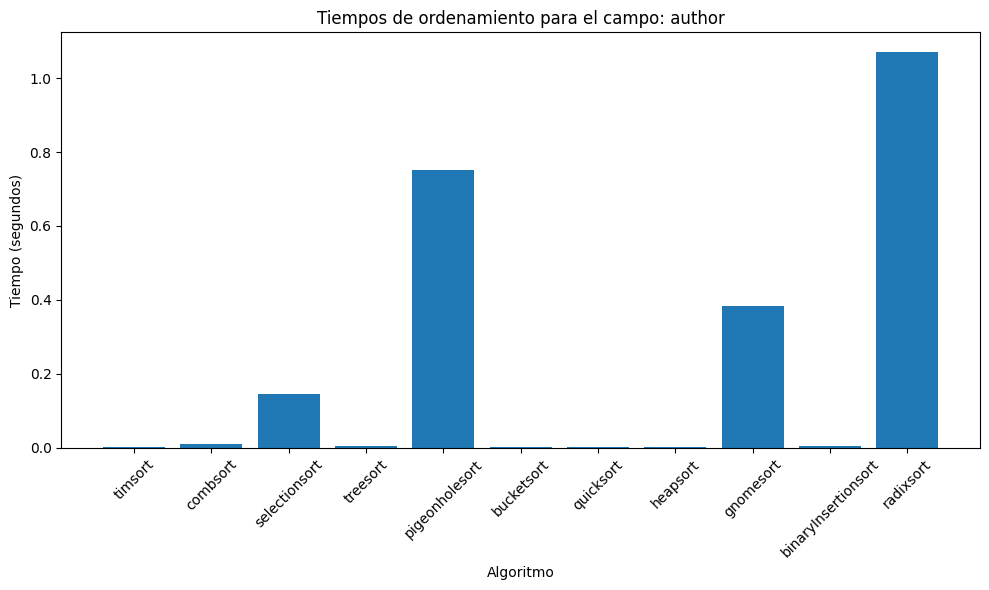

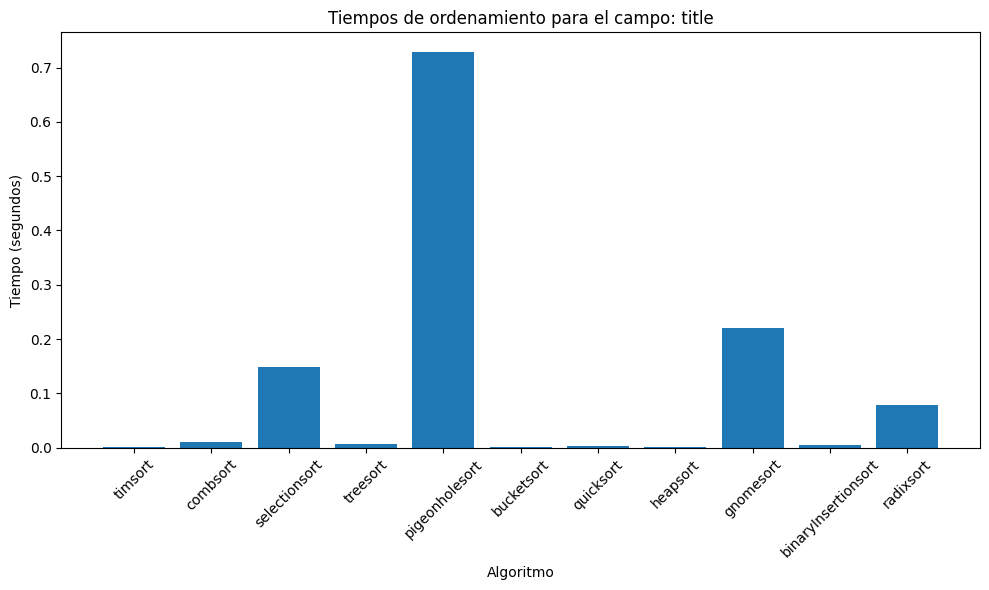

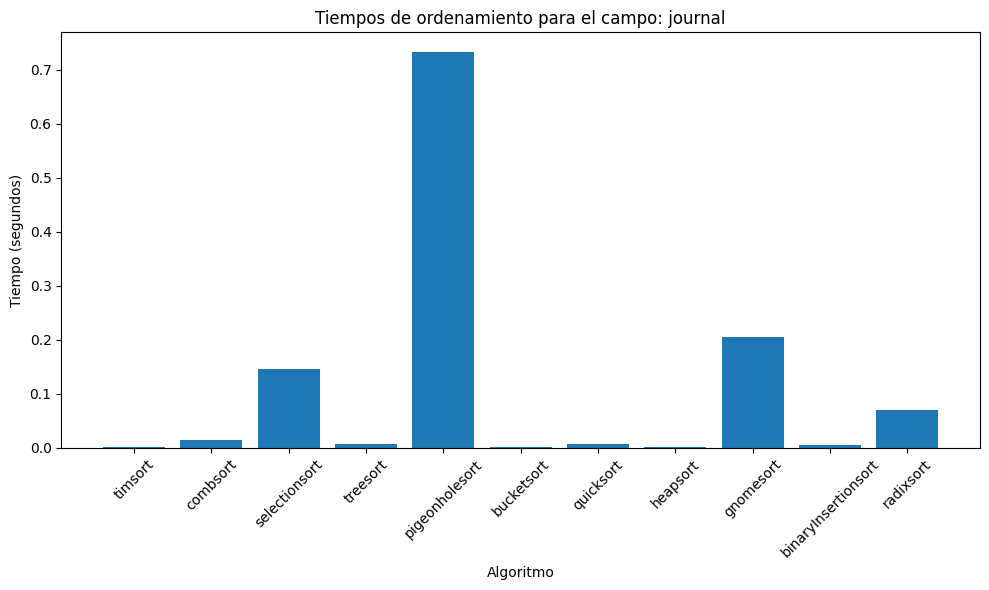

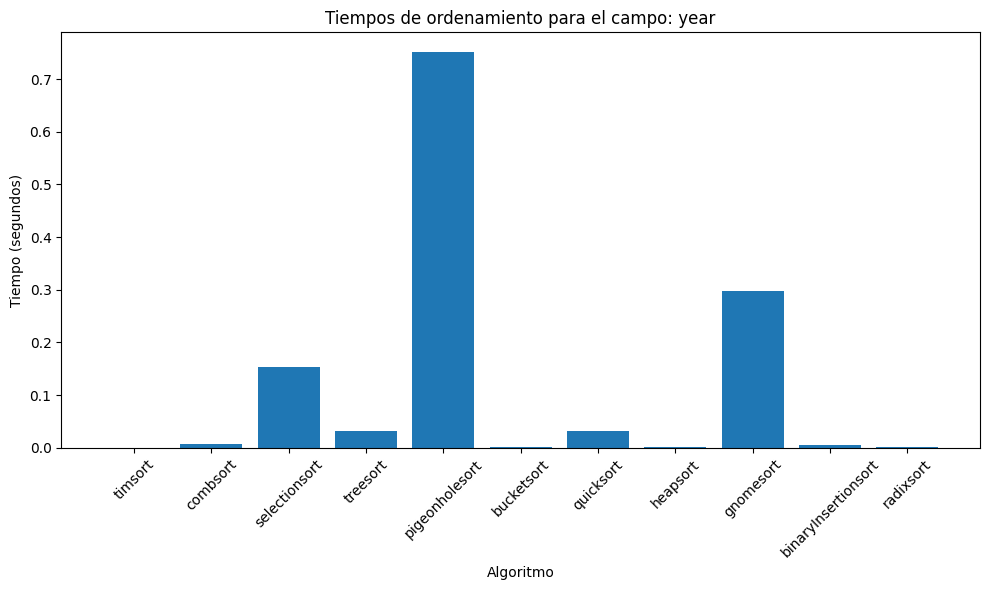

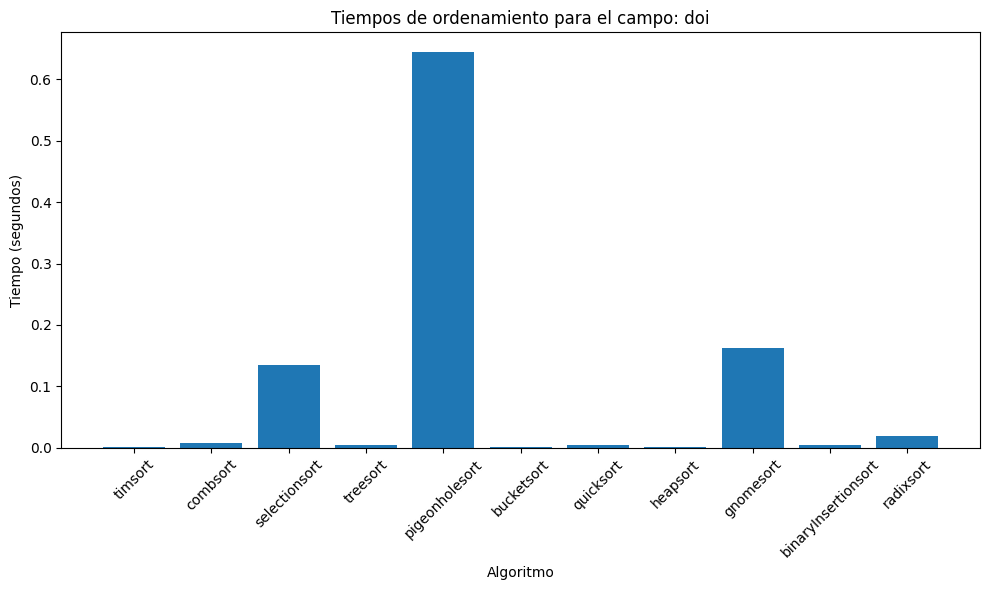

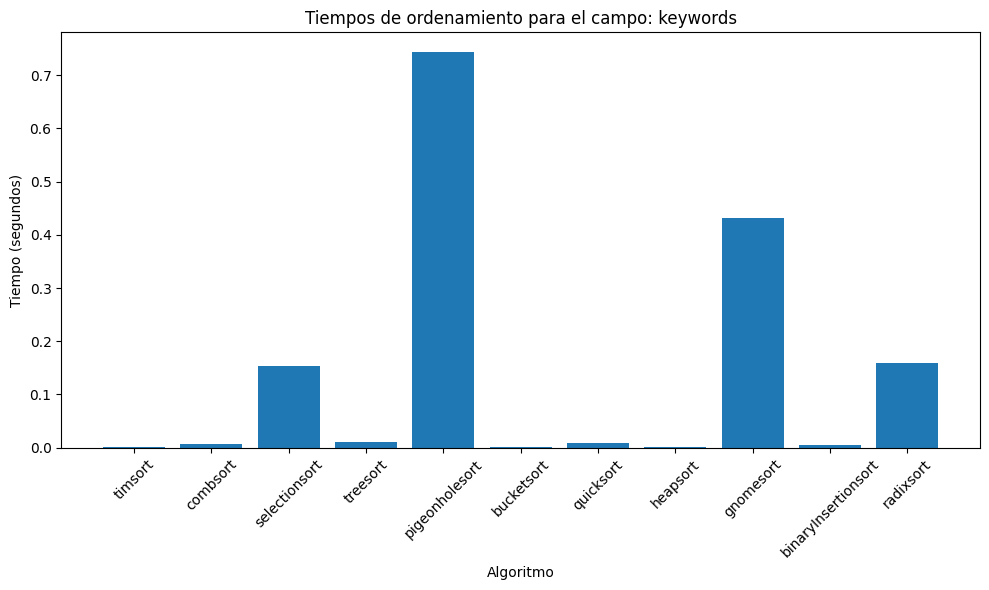

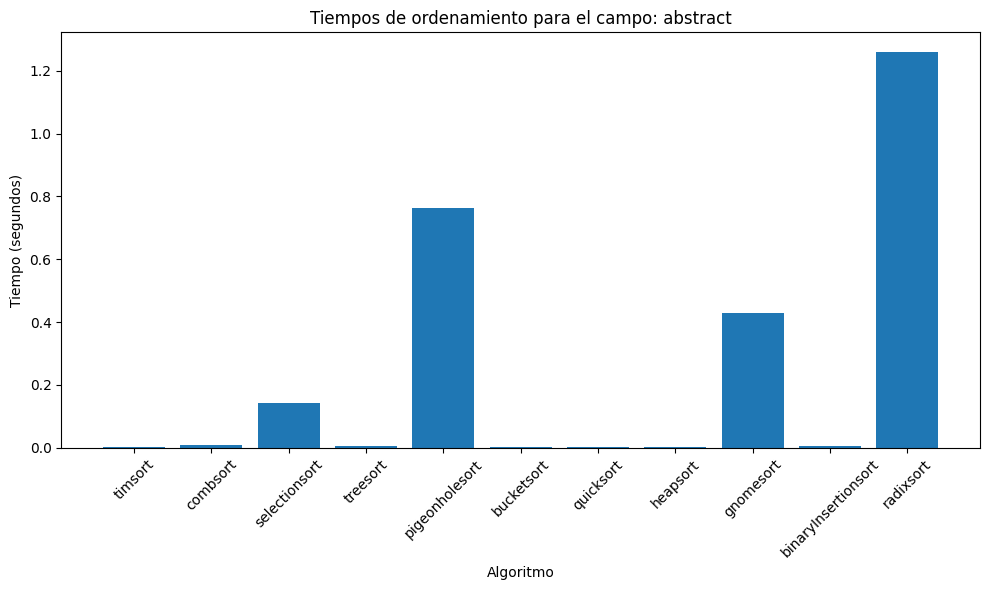

In [ ]:
import os
import re
import time
import random
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import heapq
from functools import cmp_to_key
from collections import defaultdict
import math
import bisect

# Definir rutas
BIBTEX_PATH = r"C:\Users\jose1\OneDrive\Escritorio\proyectoFinalAnalisisAlgoritmos\ArchivosConsolidados\consolidado.bib"
OUTPUT_PATH = r"C:\Users\jose1\OneDrive\Escritorio\proyectoFinalAnalisisAlgoritmos\ordenamientoSeguimiento1"
TIMING_PATH = r"C:\Users\jose1\OneDrive\Escritorio\proyectoFinalAnalisisAlgoritmos\tiemposPorAlgoritmo"

# Crear directorios si no existen
Path(OUTPUT_PATH).mkdir(parents=True, exist_ok=True)
Path(TIMING_PATH).mkdir(parents=True, exist_ok=True)

# %%
def extract_bibtex_fields(file_path):
    """
    Extrae los campos de un archivo BibTeX.
    Se buscan las claves: author, title, journal, year, doi, keywords y abstract.
    Para journal se considera también booktitle.
    Si un campo no existe se asigna como cadena vacía.
    """
    fields = {
        'author': [],
        'title': [],
        'journal': [],
        'year': [],
        'doi': [],
        'keywords': [],
        'abstract': []
    }
    
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            content = f.read()
        
        # Buscar entradas BibTeX (cualquier tipo: article, inproceedings, etc.)
        entries = re.findall(r'@\w+\s*\{[^@]*\}', content, re.DOTALL)
        
        for entry in entries:
            for field in fields.keys():
                # Buscar el campo en la entrada, manejando {valor} o "valor"
                pattern = rf'{field}\s*=\s*[\{{\"](.*?)[\}}\"]'
                match = re.search(pattern, entry, re.IGNORECASE | re.DOTALL)
                
                # Para journal, buscar booktitle si no se encontró journal
                if field == 'journal' and not match:
                    pattern = r'booktitle\s*=\s*[\{{\"](.*?)[\}}\"]'
                    match = re.search(pattern, entry, re.IGNORECASE | re.DOTALL)
                
                if match:
                    value = match.group(1).strip()
                    fields[field].append(value)
                else:
                    fields[field].append("")
        
        return fields
        
    except Exception as e:
        print(f"Error al procesar el archivo BibTeX: {e}")
        return fields

# %%
# Implementación de Algoritmos de Ordenamiento

# 1. TimSort (usando sorted de Python, que es TimSort)
def timsort(arr):
    return sorted(arr)

# 2. Comb Sort
def combsort(arr):
    arr = arr.copy()
    n = len(arr)
    gap = n
    shrink = 1.3
    sorted_flag = False
    
    while not sorted_flag:
        gap = int(gap / shrink)
        if gap <= 1:
            gap = 1
            sorted_flag = True
        
        i = 0
        while i + gap < n:
            if arr[i] > arr[i + gap]:
                arr[i], arr[i + gap] = arr[i + gap], arr[i]
                sorted_flag = False
            i += 1
    
    return arr

# 3. Selection Sort
def selectionsort(arr):
    arr = arr.copy()
    n = len(arr)
    
    for i in range(n):
        min_idx = i
        for j in range(i+1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    
    return arr

# 4. Tree Sort
class Node:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None

def insert(root, key):
    if root is None:
        return Node(key)
    if key < root.key:
        root.left = insert(root.left, key)
    else:
        root.right = insert(root.right, key)
    return root

def in_order(root, result):
    if root:
        in_order(root.left, result)
        result.append(root.key)
        in_order(root.right, result)

def treesort(arr):
    if not arr:
        return []
    
    root = None
    for item in arr:
        root = insert(root, item)
    
    result = []
    in_order(root, result)
    return result

# 5. Pigeonhole Sort
def pigeonholesort(arr):
    if not arr:
        return []
    
    min_val = 0
    max_val = 0
    
    str_to_num = {}
    for i, s in enumerate(arr):
        if s == "":
            val = -1  # Manejar cadenas vacías
        else:
            val = hash(s) % 1000000  # Limitar el rango
        str_to_num[s] = val
        
        if i == 0 or val < min_val:
            min_val = val
        if i == 0 or val > max_val:
            max_val = val
    
    size = max_val - min_val + 1
    holes = [[] for _ in range(size)]
    
    for s in arr:
        val = str_to_num[s]
        holes[val - min_val].append(s)
    
    result = []
    for hole in holes:
        result.extend(sorted(hole))
    
    return result

# 6. Bucket Sort
def bucketsort(arr):
    if not arr:
        return []
    
    buckets = defaultdict(list)
    
    for s in arr:
        key = s[0].lower() if s != "" else ""
        buckets[key].append(s)
    
    result = []
    for key in sorted(buckets.keys()):
        result.extend(sorted(buckets[key]))
    
    return result

# 7. Quick Sort
def quicksort(arr):
    arr = arr.copy()
    
    def _quicksort(arr, low, high):
        if low < high:
            pi = partition(arr, low, high)
            _quicksort(arr, low, pi - 1)
            _quicksort(arr, pi + 1, high)
    
    def partition(arr, low, high):
        pivot = arr[high]
        i = low - 1
        
        for j in range(low, high):
            if arr[j] <= pivot:
                i += 1
                arr[i], arr[j] = arr[j], arr[i]
        arr[i + 1], arr[high] = arr[high], arr[i + 1]
        return i + 1
    
    _quicksort(arr, 0, len(arr) - 1)
    return arr

# 8. Heap Sort
def heapsort(arr):
    heap = arr.copy()
    heapq.heapify(heap)
    result = []
    while heap:
        result.append(heapq.heappop(heap))
    return result

# 9. Gnome Sort
def gnomesort(arr):
    arr = arr.copy()
    n = len(arr)
    pos = 0
    
    while pos < n:
        if pos == 0 or arr[pos] >= arr[pos - 1]:
            pos += 1
        else:
            arr[pos], arr[pos - 1] = arr[pos - 1], arr[pos]
            pos -= 1
    
    return arr

# 10. Binary Insertion Sort
def binaryInsertionsort(arr):
    arr = arr.copy()
    for i in range(1, len(arr)):
        key = arr[i]
        lo, hi = 0, i
        while lo < hi:
            mid = (lo + hi) // 2
            if arr[mid] <= key:
                lo = mid + 1
            else:
                hi = mid
        arr.insert(lo, arr.pop(i))
    return arr

# 11. Radix Sort para strings (LSD)
def radixsort(arr):
    if not arr:
        return []
    # Encontrar la longitud máxima de las cadenas
    max_len = max(len(s) for s in arr)
    # Procesar desde el último carácter hasta el primero
    for pos in range(max_len - 1, -1, -1):
        buckets = {}
        for s in arr:
            # Si la cadena es muy corta, usamos "" (que se ordena antes)
            key = s[pos] if pos < len(s) else ""
            buckets.setdefault(key, []).append(s)
        sorted_keys = sorted(buckets.keys())
        arr = []
        for key in sorted_keys:
            arr.extend(buckets[key])
    return arr

# %%
# Diccionario de algoritmos a utilizar
algorithms = {
    'timsort': timsort,
    'combsort': combsort,
    'selectionsort': selectionsort,
    'treesort': treesort,
    'pigeonholesort': pigeonholesort,
    'bucketsort': bucketsort,
    'quicksort': quicksort,
    'heapsort': heapsort,
    'gnomesort': gnomesort,
    'binaryInsertionsort': binaryInsertionsort,
    'radixsort': radixsort
}

# %%
# Extraer campos del archivo BibTeX
fields = extract_bibtex_fields(BIBTEX_PATH)

# Diccionarios para almacenar resultados ordenados y tiempos
sorted_results = { key: {} for key in fields.keys() }
timings = { key: {} for key in fields.keys() }

# Para cada campo, aplicar cada algoritmo y medir el tiempo de ejecución
for field, values in fields.items():
    for algo_name, algo_func in algorithms.items():
        start_time = time.time()
        sorted_list = algo_func(values)
        end_time = time.time()
        elapsed = (end_time - start_time)
        sorted_results[field][algo_name] = sorted_list
        timings[field][algo_name] = elapsed

# %%
# Escribir archivos de salida para cada clave en OUTPUT_PATH
for field, algo_results in sorted_results.items():
    file_path = os.path.join(OUTPUT_PATH, f"{field}.txt")
    with open(file_path, 'w', encoding='utf-8') as f:
        for algo_name in algorithms.keys():
            f.write(f"# ordenamiento por {algo_name}\n")
            for item in algo_results[algo_name]:
                f.write(item + "\n")
            f.write("\n")

# %%
# Escribir archivo con tiempos de ordenamiento en TIMING_PATH
timing_file = os.path.join(TIMING_PATH, "tiempo-ordenamiento.txt")
with open(timing_file, 'w', encoding='utf-8') as f:
    f.write("Campo,Algoritmo,Tiempo (segundos)\n")
    for field, algo_times in timings.items():
        for algo_name, t in algo_times.items():
            f.write(f"{field},{algo_name},{t}\n")

# %%
# Graficar tiempos de ordenamiento para cada clave
for field, algo_times in timings.items():
    algo_names = list(algo_times.keys())
    times_list = [algo_times[algo] for algo in algo_names]
    
    plt.figure(figsize=(10,6))
    plt.bar(algo_names, times_list)
    plt.xlabel('Algoritmo')
    plt.ylabel('Tiempo (segundos)')
    plt.title(f'Tiempos de ordenamiento para el campo: {field}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    # Guardar la gráfica en TIMING_PATH (por ejemplo, "tiempo_author.png")
    plt.savefig(os.path.join(TIMING_PATH, f"tiempo_{field}.png"))
    plt.show()